# Final Project Master Class DS H8

Buatlah sebuah dashboard menggunakan streamlit dengan kriteria sebagai berikut:
1. Data yang digunakan adalah file "supermarket_sales - Sheet1.csv"
2. Tampilkan paling tidak 4 diagram dan paling tidak 1 diagram dibuat secara interaktif
3. Diagram harus sesuai dengan masalah yang ingin dibahas dan sesuai dengan kepada siapa dashboard ditujukan
4. Layout, warna, dan lainnya yang berkaitan dengan tampilan dibebaskan
5. Buat semenarik mungkin dan informatif
6. Dashboard akan dipresentasikan pada pertemuan terakhir dengan durasi 3 menit
7. File .py dikumpulkan paling lambat Hari Jumat, 5 November 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import pandas as pd
data = pd.read_csv('data/supermarket_sales - Sheet1.csv')
# data['Date'] = data.Date.astype('datetime64[ns]')
data['Date'] = pd.to_datetime(data['Date'])
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


1. Diagram jenis product line yang sering dipilih di Yangon, napytaw, Mandalay untuk masing masing produk --> untuk mengetahui jenis product yang digandrungi
2. Kuantitas penjualan dari setiap product line setiap bulan
3. Diagram Rating pada setiap lini produk untuk semua negara || masing-masing kota --> untuk mengetahui kualitas produk
4. Pendapatan kotor dari masing-masing produk line untuk semua negara || masing-masing kota --> untuk mengetahui pendapatan kotor dari masing-masing produk
5. Kuantitas yang dibeli oleh member untuk masing-masing produk --> untuk mengetahui apakah member memberikan dampak untuk meningkatkan kemauan konsumer dalam berbelanja


In [3]:
sorted_df=data.copy()
sorted_df=sorted_df.sort_values(by='Unit price').reset_index()
sorted_df=sorted_df.drop('index',axis=1)
cities=sorted_df['City'].unique()
cities

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [4]:
sorted_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,333-23-2632,A,Yangon,Member,Male,Health and beauty,10.08,7,3.5280,74.0880,2019-03-28,20:14,Cash,70.56,4.761905,3.5280,4.2
1,239-48-4278,A,Yangon,Member,Male,Food and beverages,10.13,7,3.5455,74.4555,2019-03-10,19:35,Ewallet,70.91,4.761905,3.5455,8.3
2,516-77-6464,C,Naypyitaw,Member,Female,Health and beauty,10.16,5,2.5400,53.3400,2019-02-24,13:08,Ewallet,50.80,4.761905,2.5400,4.1
3,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2019-02-07,14:15,Cash,10.17,4.761905,0.5085,5.9
4,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.0720,85.5120,2019-03-30,12:51,Credit card,81.44,4.761905,4.0720,9.5


In [5]:
product_line=sorted_df['Product line'].unique()
product_line

array(['Health and beauty', 'Food and beverages', 'Sports and travel',
       'Fashion accessories', 'Home and lifestyle',
       'Electronic accessories'], dtype=object)

###  1. Diagram jenis product line yang sering dipilih di Yangon, napytaw, Mandalay untuk masing masing produk--> untuk mengetahui jenis product yang digandrungi

In [6]:
df1=sorted_df.copy()
# df1=df1[df1['City']=='Naypyitaw']
# df1=df1.groupby(['Product line'])['Product line'].count()
# df1.head()
df1.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [7]:
# df1 = df1.groupby(['City','Product line',''])['Product line'].count()
# df1

#### Kuantitas produk setiap kota

In [8]:
df1_quantity=df1.groupby([pd.Grouper(key='Date',freq='M'),pd.Grouper('City'),
                      pd.Grouper('Product line')]).sum() ##untuk setiap kota
df1_countPL=df1_quantity[['Quantity']]
df1_countPL.head()

Quantity
Date       City     Product line                    
2019-01-31 Mandalay Electronic accessories       119
                    Fashion accessories          103
                    Food and beverages           102
                    Health and beauty             91
                    Home and lifestyle            73

#### Diagram bar

<AxesSubplot:xlabel='City', ylabel='Jumlah'>

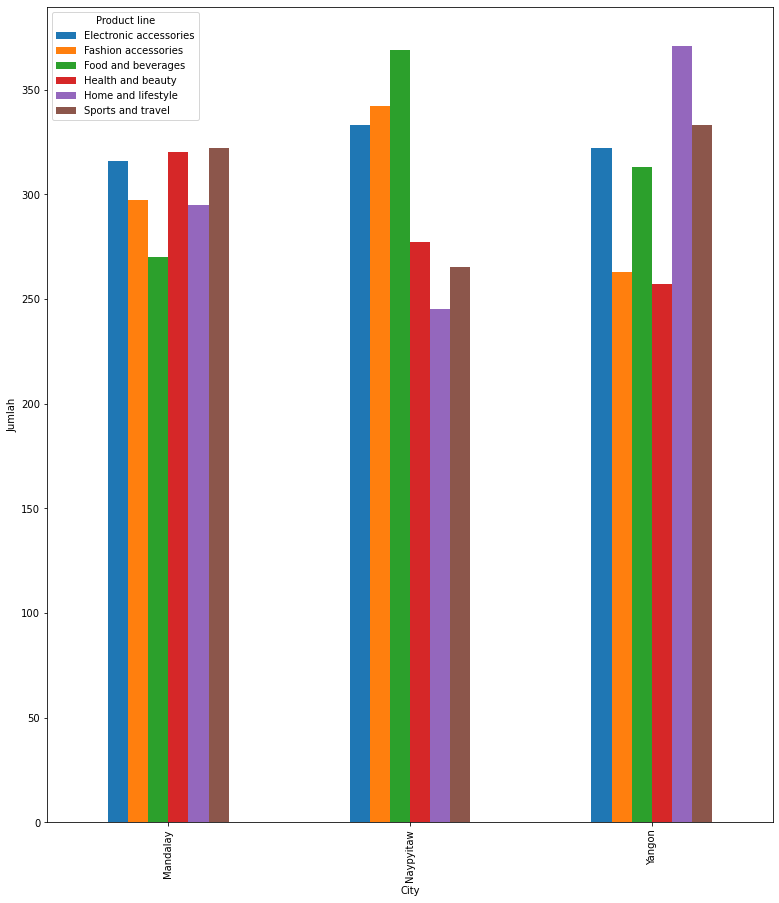

In [9]:
fig, ax= plt.subplots(figsize=(13,15))
ax.set_xlabel('Kota')
ax.set_ylabel('Jumlah')
df1.groupby(['City','Product line']).sum()['Quantity'].unstack().plot(ax=ax, kind='bar')

### 2.Kuantitas penjualan dari setiap product line setiap bulan

In [10]:
df2_quantity=df1.groupby([pd.Grouper(key='Date',freq='M'),
                      pd.Grouper('Product line')]).sum() ##untuk semua kota
df2_countPL=df2_quantity[['Quantity']]
df2_countPL=df2_countPL.reset_index()
df2_countPL

,Date,Product line,Quantity
0,2019-01-31,Electronic accessories,333
1,2019-01-31,Fashion accessories,336
2,2019-01-31,Food and beverages,325
3,2019-01-31,Health and beauty,254
4,2019-01-31,Home and lifestyle,342
5,2019-01-31,Sports and travel,375
6,2019-02-28,Electronic accessories,313
7,2019-02-28,Fashion accessories,295
8,2019-02-28,Food and beverages,349
9,2019-02-28,Health and beauty,266


In [11]:
prodLine=df1['Product line'].unique()
prodLine

array(['Health and beauty', 'Food and beverages', 'Sports and travel',
       'Fashion accessories', 'Home and lifestyle',
       'Electronic accessories'], dtype=object)

Text(0.5, 1.0, 'Kuantitas penjualan produk setiap bulan')

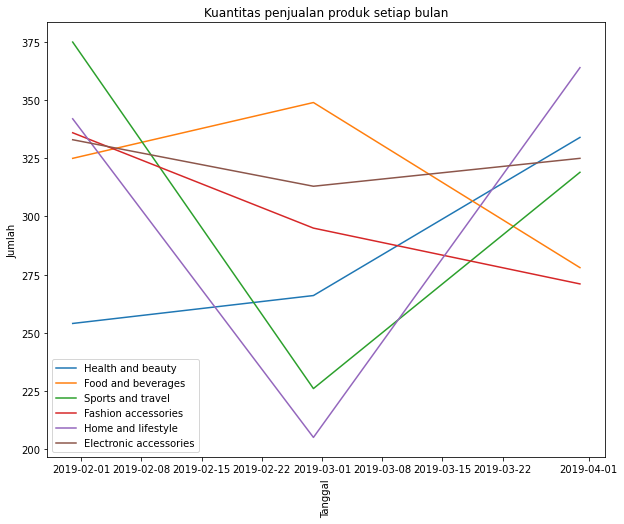

In [12]:
fig, ax2= plt.subplots(figsize=(10,8))
ax2.set_xlabel('Tanggal',rotation='vertical')
ax2.set_ylabel('Jumlah')

x=df2_countPL['Date'].drop_duplicates()
y=df2_countPL['Quantity'][(df2_countPL['Product line']=='Health and beauty')]

for kind in prodLine:
    y=df2_countPL['Quantity'][(df2_countPL['Product line']==kind)]
    ax2.plot(x,y)

ax2.legend(df1['Product line'].unique())
ax2.set_title('Kuantitas penjualan produk setiap bulan')
# print(x)
# print(y)

### 3. Diagram Rating pada setiap lini produk untuk semua negara || masing-masing kota--> untuk mengetahui kualitas produk

#### Rata-rata rating produk untuk setiap kota dan setiap bulan

In [13]:
df1_rating=df1.groupby([pd.Grouper(key='Date',freq='M'),pd.Grouper('City'),
                      pd.Grouper('Product line')]).mean()
df1_meanRate=df1_rating[['Rating']]
df1_meanRate=df1_meanRate.reset_index()
df1_meanRate.head()

,Date,City,Product line,Rating
0,2019-01-31,Mandalay,Electronic accessories,6.800000
1,2019-01-31,Mandalay,Fashion accessories,6.671429
2,2019-01-31,Mandalay,Food and beverages,7.863158
3,2019-01-31,Mandalay,Health and beauty,6.975000
4,2019-01-31,Mandalay,Home and lifestyle,6.400000


In [14]:
df_city.groupby(['Product line',pd.Grouper(key='Date',freq='M')]).mean()['Rating'].unstack()

NameError: name 'df_city' is not defined

<AxesSubplot:title={'center':'Rata-rata rating produk dari kota Yangon'}, xlabel='Date'>

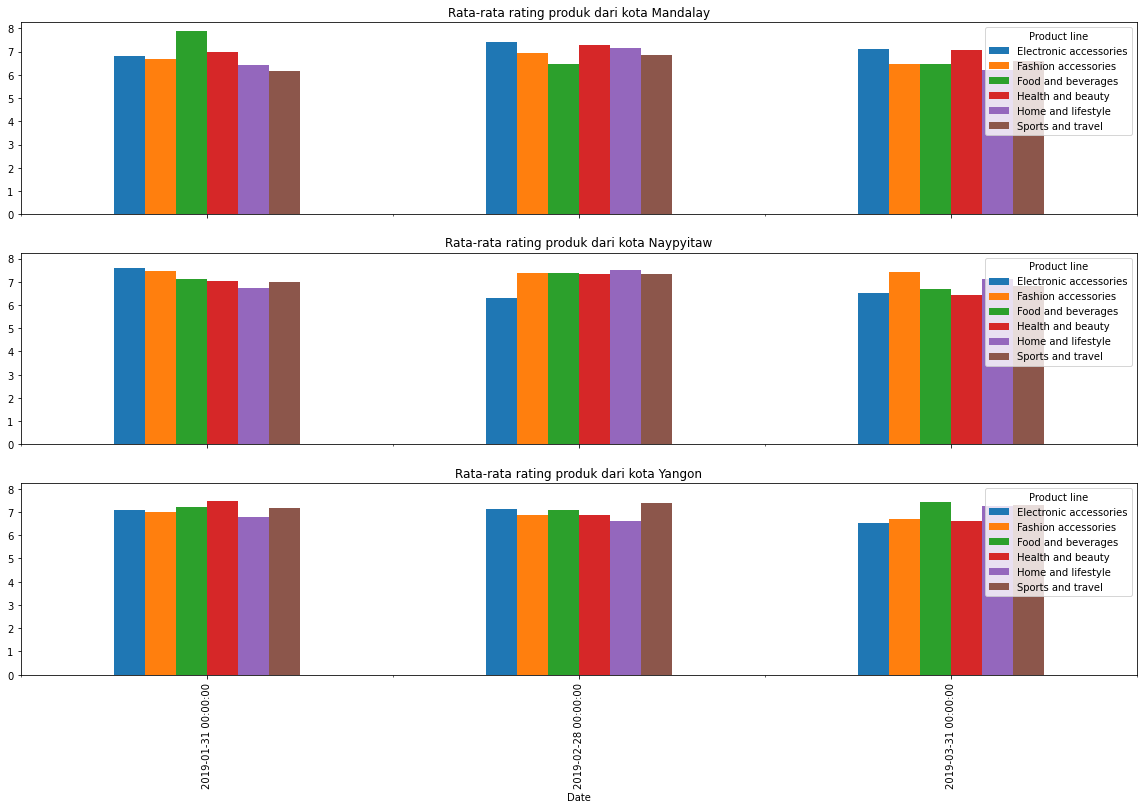

In [15]:
fig3,ax3=plt.subplots(3,sharex=True,sharey=True,figsize=(20,12))
city=df1_meanRate['City'].drop_duplicates().to_list()

ax3[0].set_title('Rata-rata rating produk dari kota {}'.format(city[0]))
ax3[1].set_title('Rata-rata rating produk dari kota {}'.format(city[1]))
ax3[2].set_title('Rata-rata rating produk dari kota {}'.format(city[2]))

## Untuk kota mandalay
df_city=df1_meanRate[(df1_meanRate['City']==city[0])]
df_city.groupby([pd.Grouper(key='Date',freq='M'),'Product line']).mean()['Rating'].unstack().plot(ax=ax3[0], kind='bar')

## Untuk kota Naypyitaw
df_city=df1_meanRate[(df1_meanRate['City']==city[1])]
df_city.groupby([pd.Grouper(key='Date',freq='M'),'Product line']).mean()['Rating'].unstack().plot(ax=ax3[1], kind='bar')

## Untuk kota Yangon
df_city=df1_meanRate[(df1_meanRate['City']==city[2])]
df_city.groupby([pd.Grouper(key='Date',freq='M'),'Product line']).mean()['Rating'].unstack().plot(ax=ax3[2], kind='bar')

### 3. Pendapatan kotor dari masing-masing produk line untuk semua negara || masing-masing kota --> untuk mengetahui pendapatan kotor dari masing-masing produk

In [23]:
df1_income=df1.groupby([pd.Grouper(key='Date',freq='M'),pd.Grouper('City'),
                      pd.Grouper('Product line')]).sum()
df1_income=df1_income[['gross income']]
df1_income.head()

gross income
Date       City     Product line                        
2019-01-31 Mandalay Electronic accessories      319.0370
                    Fashion accessories         291.0760
                    Food and beverages          314.7275
                    Health and beauty           304.7565
                    Home and lifestyle          218.4020

In [21]:
df2_income=df1.groupby([pd.Grouper(key='Date',freq='M'),
                      pd.Grouper('Product line')]).sum()
df2_income=df2_income[['gross income']]
df2_income.head()

gross income
Date       Product line                        
2019-01-31 Electronic accessories       896.728
           Fashion accessories          921.196
           Food and beverages           931.930
           Health and beauty            780.151
           Home and lifestyle           975.940

### 4. Kuantitas yang dibeli oleh member untuk masing-masing produk --> untuk mengetahui apakah member memberikan dampak untuk meningkatkan kemauan konsumer dalam berbelanja

In [18]:
df1_member=df1.groupby([pd.Grouper(key='Date',freq='M'),
                        pd.Grouper('Customer type')]).sum()
df1_member=df1_member[['Quantity']]
df1_member

Quantity
Date       Customer type          
2019-01-31 Member              964
           Normal             1001
2019-02-28 Member              838
           Normal              816
2019-03-31 Member              983
           Normal              908

In [19]:
df2_member=df1.groupby(pd.Grouper('Customer type').sum()['Quantity'])
            
# df2_member=df2_member[['Quantity']]
# df2_member

AttributeError: 'Grouper' object has no attribute 'sum'

In [ ]:
df2_member